In [1]:
#for paper Impact of Stereotype Threat on Digitally Administered Depression Screening Instruments

import pandas as pd
import scipy.stats
import numpy as np
#import best
import matplotlib.pyplot as plt
import pymc3 as pm

data = pd.read_csv("dataFinal.csv")
data.head()

C:\Users\mltla\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,sessionid,phoneids,prolificVersion,Completion,PHQ-Q1,PHQ-Q2,PHQ-Q3,PHQ-Q4,PHQ-Q5,PHQ-Q6,...,GAD-Q6,GAD-Q7,GAD-total,Gender,Age,studentStatus,depressionTreatment,Covid,WFH,Race/Ethnicity
0,00568a204761c742EQ4JETCS0,00568a204761c742,control,complete,0,0,1,1,0,0,...,0,0,0,Woman,24-39,"No, I am not a student",No,No/I don't know,Yes - Part Time,Hispanic/Latino
1,01ddd948426a2009PRSU5PFDZ,01ddd948426a2009,stereotype threat,complete,0,0,1,1,1,0,...,0,0,1,Man,40-55,"No, I am not a student",Yes,Yes,Yes - Full Time,White/Caucasian
2,023ffde796006c6e21Q5B0HU6,023ffde796006c6e,control,complete,0,0,0,0,0,0,...,1,0,2,Man,24-39,"Yes, I am a graduate student",No,No/I don't know,No - Not At All,White/Caucasian
3,035b89739144c3ec2L01TM7RR,035b89739144c3ec,control,complete,3,3,3,3,3,3,...,3,3,20,Man,24-39,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian
4,03d71aee534509beGGQCID86U,03d71aee534509be,control,complete,2,1,2,3,3,2,...,3,1,9,Woman,18-23,"No, I am not a student",Yes,No/I don't know,No - Not At All,White/Caucasian


In [2]:
man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
manST = man[man.prolificVersion == 'stereotype threat']
manC = man[man.prolificVersion == 'control']
woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
womanST = woman[woman.prolificVersion == 'stereotype threat']
womanC = woman[woman.prolificVersion == 'control']
other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
otherST = other[other.prolificVersion == 'stereotype threat']
otherC = other[other.prolificVersion == 'control']

In [3]:
manST9 = list(map(int, manST["PHQ-Total"].to_numpy()))
manC9 = list(map(int, manC["PHQ-Total"].to_numpy()))
womanST9 = list(map(int, womanST["PHQ-Total"].to_numpy()))
womanC9 = list(map(int, womanC["PHQ-Total"].to_numpy()))
otherST9 = list(map(int, otherST["PHQ-Total"].to_numpy()))
otherC9 = list(map(int, otherC["PHQ-Total"].to_numpy()))

In [4]:
print("men")
print(len(manST9))
print(len(manC9))

print("women")
print(len(womanST9))
print(len(womanC9))

print("other")
print(len(otherST9))
print(len(otherC9))

men
28
36
women
54
49
other
4
5


In [72]:
print("men")
print(sum(manST9)/len(manST9))
print(np.std(manST9))
print(sum(manC9)/len(manC9))
print(np.std(manC9))
print(scipy.stats.ttest_ind(manST9, manC9))
print("women")
print(sum(womanST9)/len(womanST9))
print(np.std(womanST9))
print(sum(womanC9)/len(womanC9))
print(np.std(womanC9))
print(scipy.stats.ttest_ind(womanST9, womanC9))
print("other")
print(sum(otherST9)/len(otherST9))
print(np.std(otherST9))
print(sum(otherC9)/len(otherC9))
print(np.std(otherC9))
print(scipy.stats.ttest_ind(otherST9, otherC9))

men
12.285714285714286
6.363159271805739
13.472222222222221
7.372946460281184
Ttest_indResult(statistic=-0.6669285254883508, pvalue=0.5072923179788572)
women
15.703703703703704
6.723727002273173
13.142857142857142
5.2876444352347844
Ttest_indResult(statistic=2.112935820267334, pvalue=0.03707103706709777)
other
15.0
7.44983221287567
18.2
1.9390719429665315
Ttest_indResult(statistic=-0.813325708440558, pvalue=0.4428122302946397)


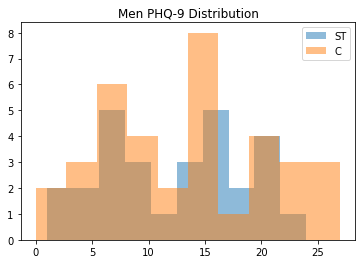

In [34]:
plt.hist(manST9, alpha = 0.5, label = "ST")
plt.hist(manC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Men PHQ-9 Distribution")
plt.show()

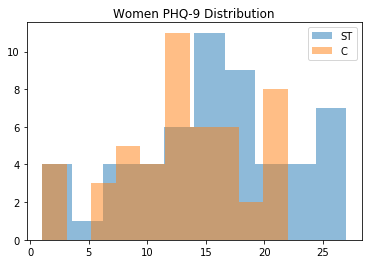

In [35]:
plt.hist(womanST9, alpha = 0.5, label = "ST")
plt.hist(womanC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Women PHQ-9 Distribution")
plt.show()

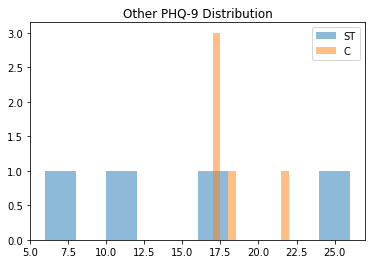

In [36]:
plt.hist(otherST9, alpha = 0.5, label = "ST")
plt.hist(otherC9, alpha = 0.5, label = "C")
plt.legend()
plt.title("Other PHQ-9 Distribution")
plt.show()

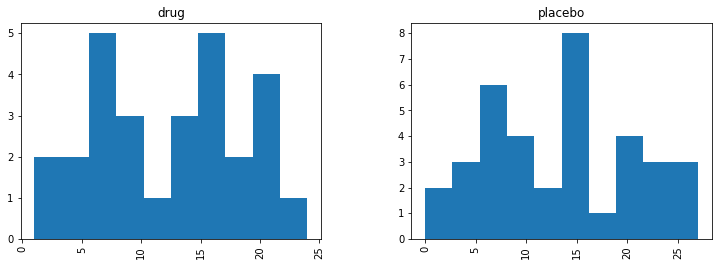

In [37]:
#https://docs.pymc.io/notebooks/BEST.html

drug = manST9
placebo = manC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


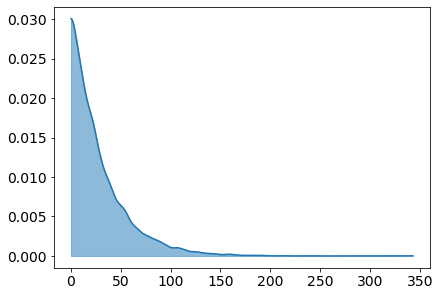

In [38]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [39]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [40]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [41]:
with model:
    trace = pm.sample(2000)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 446 seconds.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


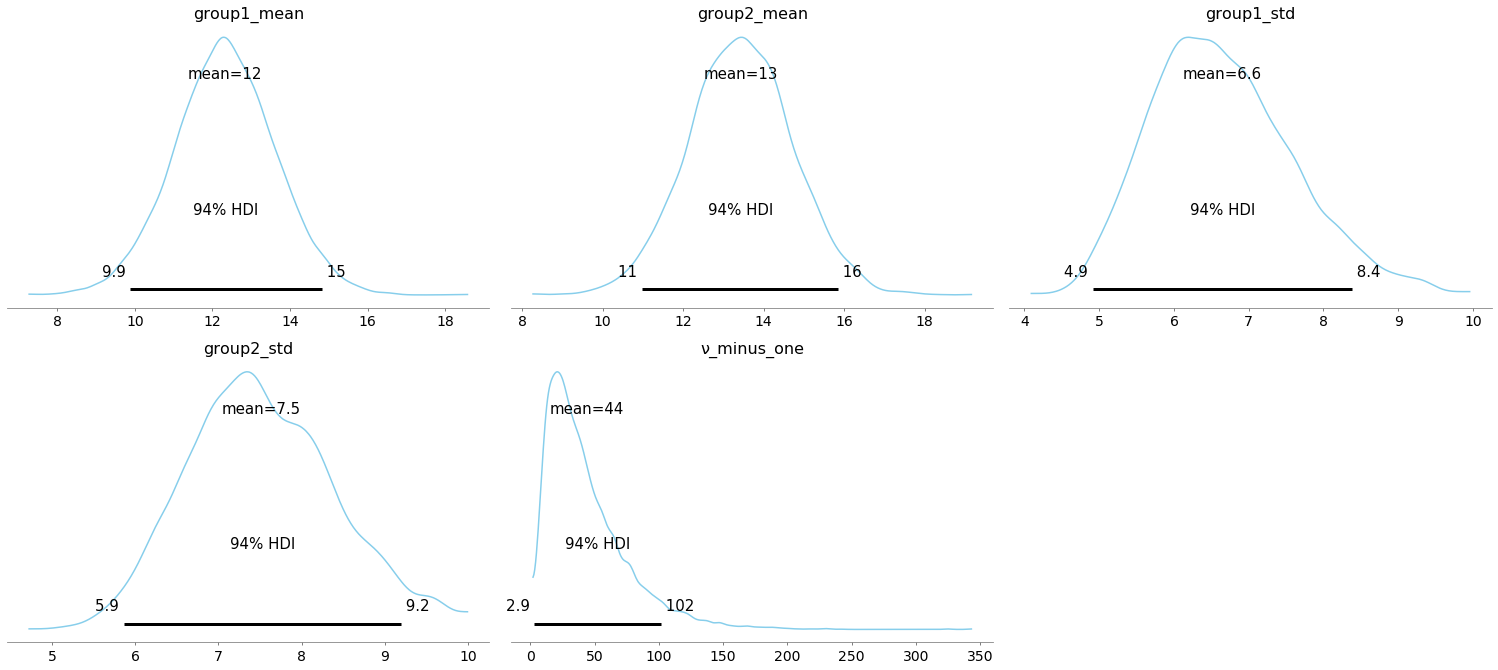

In [42]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


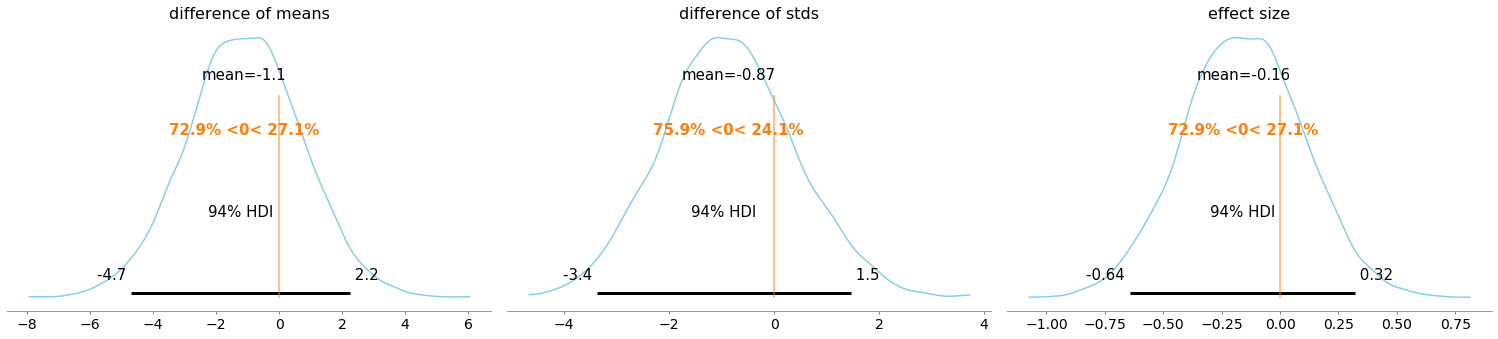

In [43]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


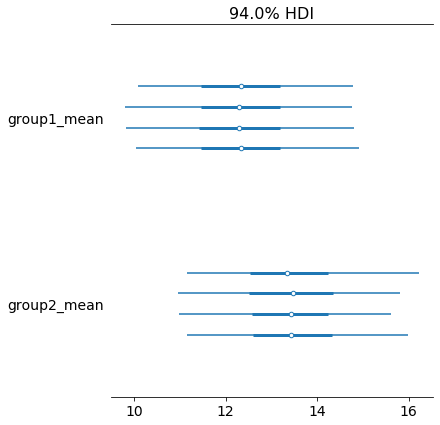

In [44]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


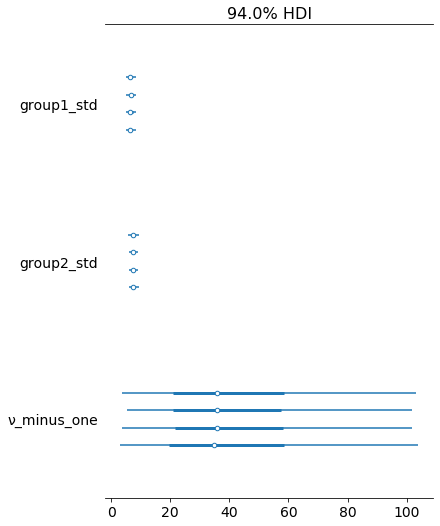

In [45]:
pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);

In [46]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,-1.109,1.850,-4.697,2.240,0.023,0.019,6397.0,5329.0,1.0
difference of stds,-0.872,1.279,-3.368,1.457,0.019,0.016,4646.0,3910.0,1.0
effect size,-0.157,0.258,-0.644,0.320,0.003,0.003,6424.0,5068.0,1.0


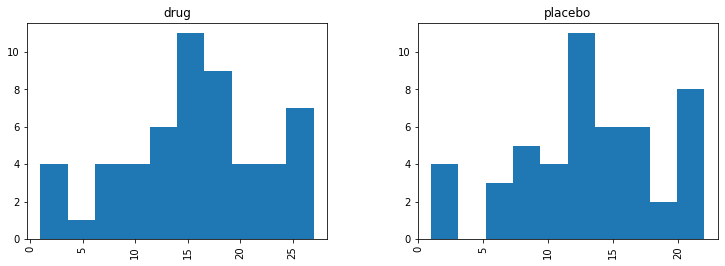

In [47]:
#https://docs.pymc.io/notebooks/BEST.html

drug = womanST9
placebo = womanC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


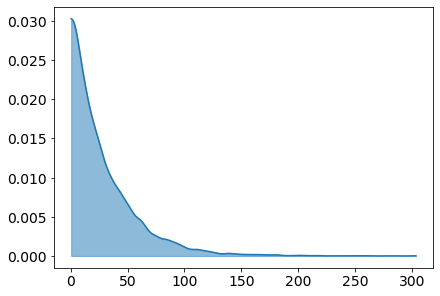

In [48]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [49]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [50]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [51]:
with model:
    trace = pm.sample(2000)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 434 seconds.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


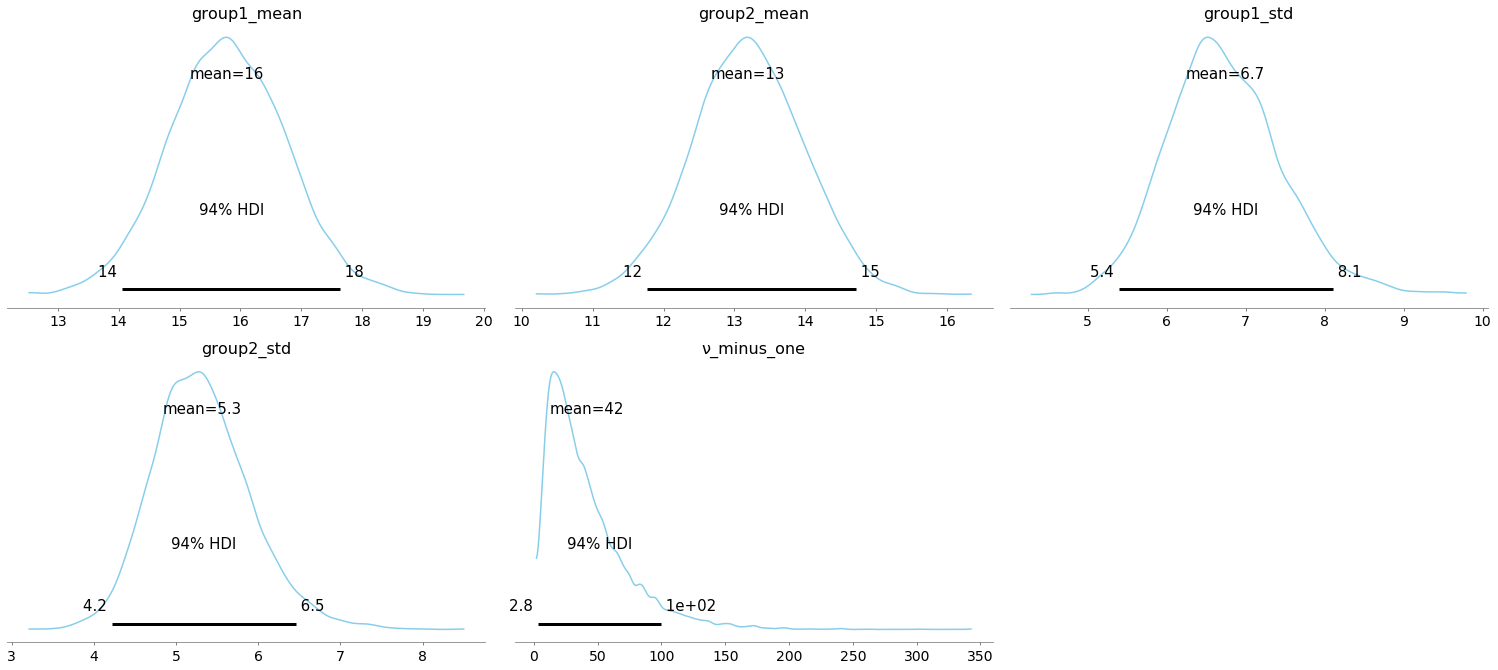

In [52]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


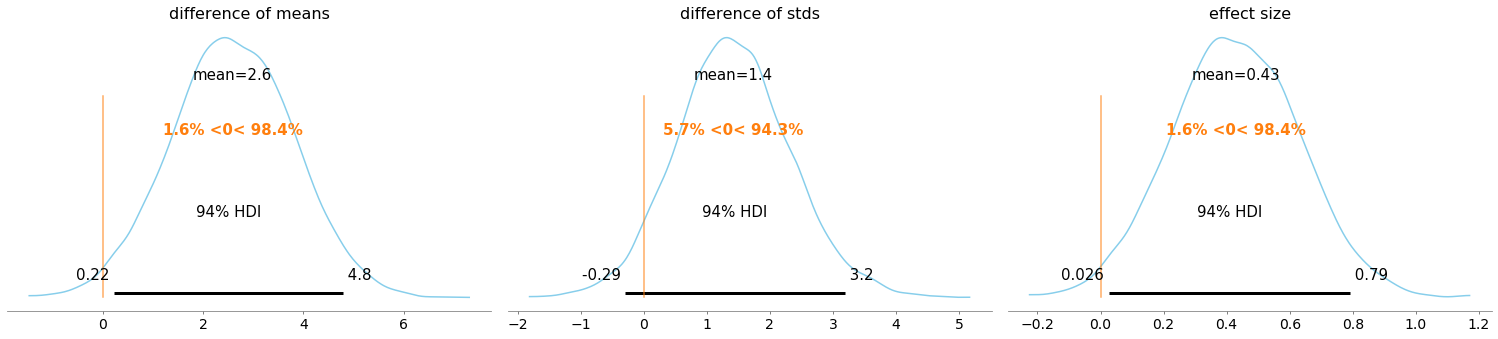

In [53]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


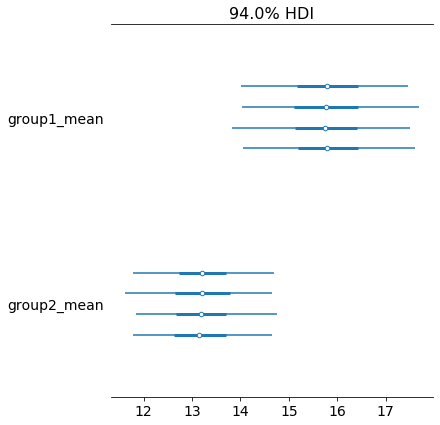

In [54]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


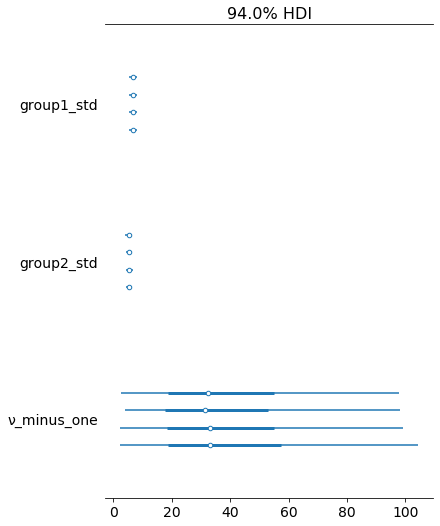

In [55]:
pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);

In [56]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,2.587,1.220,0.223,4.794,0.015,0.011,6697.0,5655.0,1.0
difference of stds,1.419,0.922,-0.289,3.185,0.012,0.010,5747.0,3967.0,1.0
effect size,0.428,0.204,0.026,0.791,0.002,0.002,6683.0,5711.0,1.0


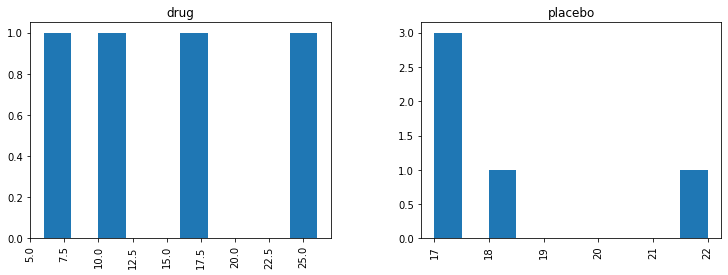

In [57]:
#https://docs.pymc.io/notebooks/BEST.html

drug = otherST9
placebo = otherC9

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.


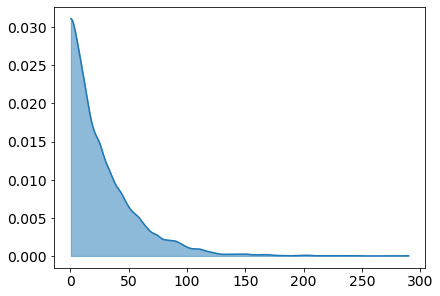

In [58]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
    
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
    
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});

In [59]:
with model:
    λ1 = group1_std ** -2
    λ2 = group2_std ** -2

    group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [60]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )

In [61]:
with model:
    trace = pm.sample(500)

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_me

Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 93 seconds.
The acceptance probability does not match the target. It is 0.8875298400057309, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


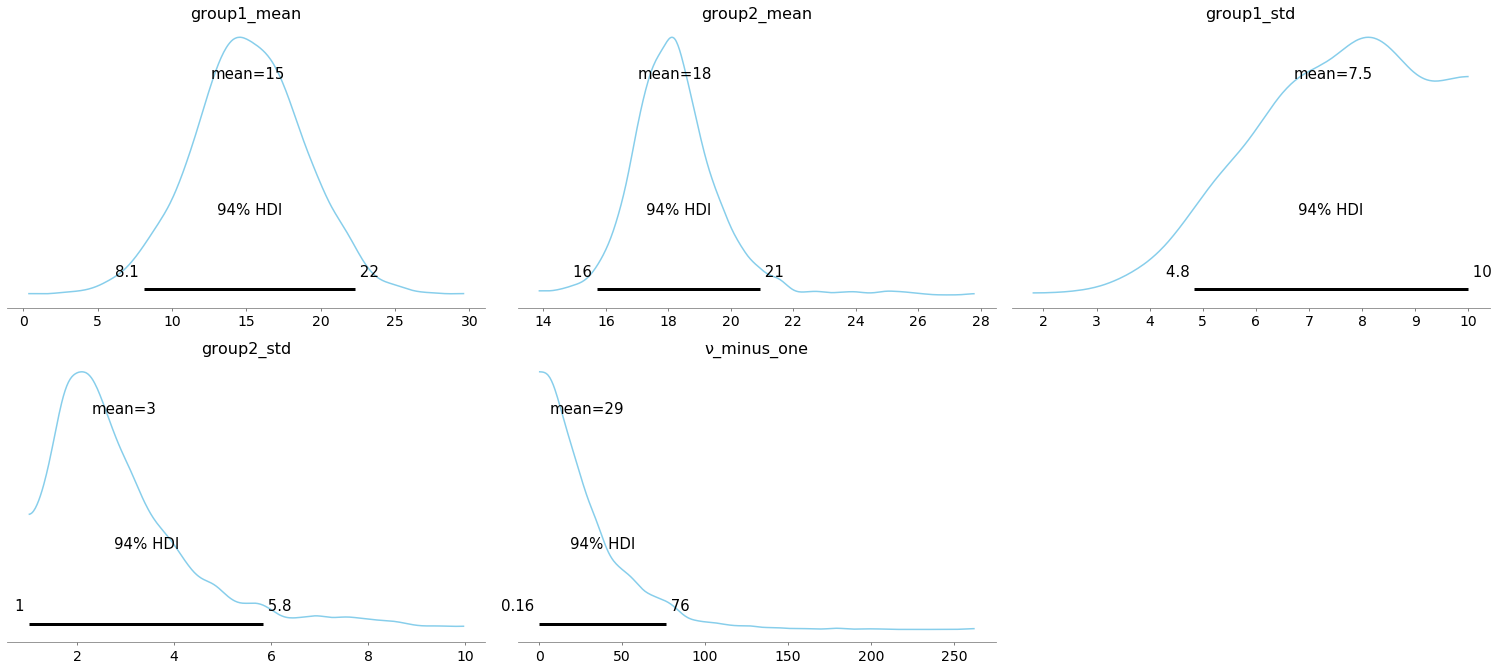

In [62]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


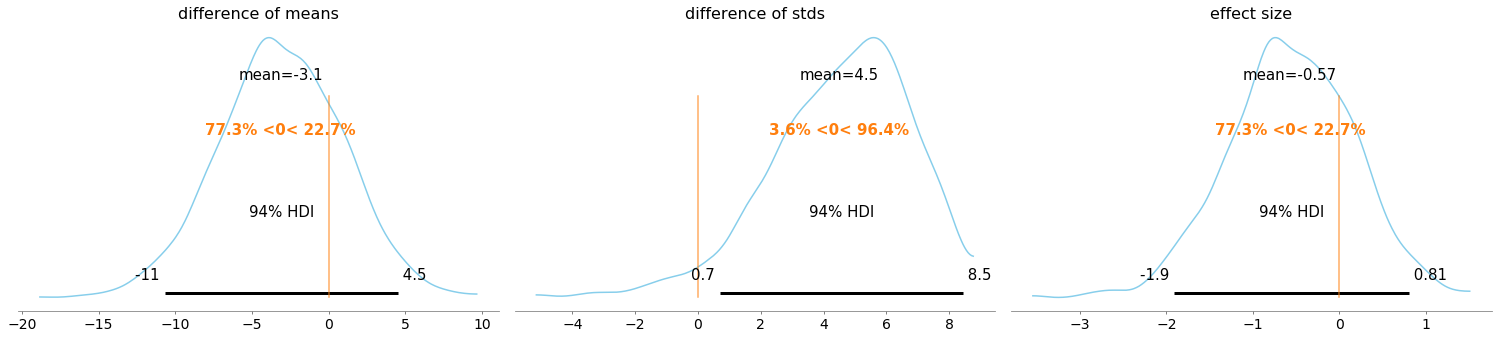

In [63]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


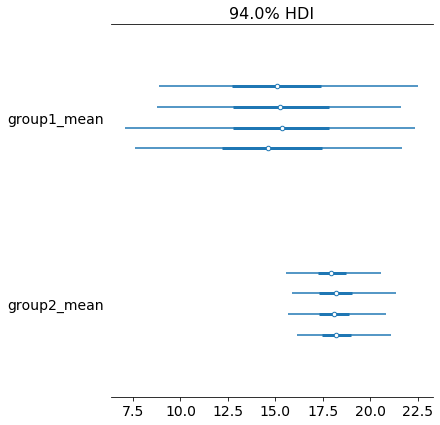

In [64]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


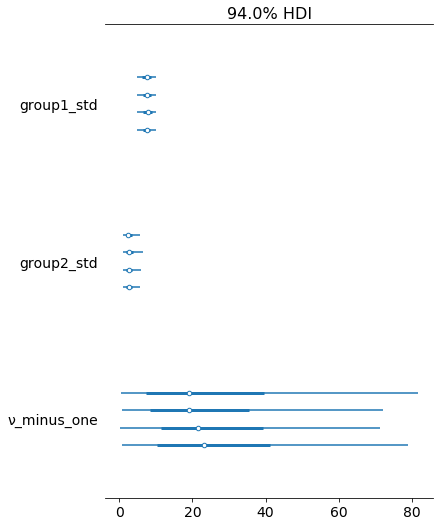

In [65]:
pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);

In [66]:
pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"])

C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
difference of means,-3.121,4.061,-10.688,4.538,0.110,0.101,1383.0,888.0,1.00
difference of stds,4.493,2.237,0.698,8.457,0.063,0.046,1210.0,1043.0,1.01
effect size,-0.568,0.731,-1.910,0.812,0.019,0.015,1514.0,1290.0,1.00


In [67]:
Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = womanST9
    placebo = womanC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1023 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.287  0.216  -0.093    0.713      0.003    0.002   
difference of stds  -0.012  0.091  -0.191    0.163      0.001    0.001   
effect size          0.268  0.201  -0.102    0.653      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    6178.0    4864.0    1.0  
difference of stds     6321.0    6035.0    1.0  
effect size            6306.0    5165.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 976 seconds.
The acceptance probability does not match the target. It is 0.9326511525143342, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.215  0.220  -0.211    0.613      0.003    0.002   
difference of stds  -0.013  0.105  -0.220    0.193      0.001    0.001   
effect size          0.198  0.202  -0.167    0.591      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5556.0    4169.0    1.0  
difference of stds     5038.0    5230.0    1.0  
effect size            5673.0    4563.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 527 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.308  0.218  -0.107    0.711      0.003    0.002   
difference of stds  -0.021  0.115  -0.246    0.203      0.002    0.001   
effect size          0.281  0.199  -0.090    0.651      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5246.0    4870.0    1.0  
difference of stds     5671.0    5943.0    1.0  
effect size            5333.0    4932.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 494 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.098  0.215  -0.313    0.483      0.003    0.002   
difference of stds  -0.018  0.093  -0.200    0.160      0.001    0.001   
effect size          0.091  0.200  -0.288    0.450      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5232.0    5055.0    1.0  
difference of stds     6351.0    5540.0    1.0  
effect size            5322.0    4969.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 523 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.380  0.218  -0.044    0.771      0.003    0.002   
difference of stds   0.016  0.108  -0.187    0.228      0.001    0.001   
effect size          0.347  0.200  -0.020    0.729      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5995.0    5341.0    1.0  
difference of stds     5379.0    5798.0    1.0  
effect size            6114.0    5187.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 535 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.344  0.239  -0.134    0.768      0.003    0.002   
difference of stds  -0.012  0.146  -0.280    0.281      0.002    0.001   
effect size          0.298  0.207  -0.105    0.674      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4935.0    3843.0    1.0  
difference of stds     5386.0    5175.0    1.0  
effect size            4955.0    3840.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 538 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.276  0.233  -0.170    0.694      0.003    0.002   
difference of stds   0.051  0.132  -0.202    0.306      0.002    0.001   
effect size          0.244  0.206  -0.129    0.638      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5329.0    4297.0    1.0  
difference of stds     5744.0    5670.0    1.0  
effect size            5453.0    4285.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 511 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.402  0.222  -0.008    0.806      0.003    0.002   
difference of stds   0.145  0.119  -0.053    0.386      0.002    0.001   
effect size          0.360  0.199  -0.007    0.726      0.002    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    6240.0    5376.0    1.0  
difference of stds     5190.0    4529.0    1.0  
effect size            6460.0    5476.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 502 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.244  0.213  -0.136    0.663      0.003    0.002   
difference of stds   0.024  0.072  -0.104    0.178      0.001    0.001   
effect size          0.231  0.202  -0.137    0.618      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4508.0    4521.0    1.0  
difference of stds     6165.0    4848.0    1.0  
effect size            4584.0    4697.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 522 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.041  0.218  -0.341    0.487      0.003    0.003   
difference of stds  -0.006  0.103  -0.223    0.182      0.001    0.001   
effect size          0.038  0.200  -0.354    0.405      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5573.0    4795.0    1.0  
difference of stds     6017.0    5928.0    1.0  
effect size            5661.0    4839.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 505 seconds.
The acceptance probability does not match the target. It is 0.7211912157883212, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.295  0.224  -0.118    0.724      0.003    0.003   
difference of stds   0.046  0.131  -0.188    0.305      0.002    0.001   
effect size          0.262  0.199  -0.106    0.640      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4546.0    3975.0    1.0  
difference of stds     5270.0    4739.0    1.0  
effect size            4636.0    4410.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 507 seconds.
The acceptance probability does not match the target. It is 0.714318275675229, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.328  0.220  -0.102    0.721      0.003    0.002   
difference of stds  -0.019  0.116  -0.252    0.196      0.001    0.001   
effect size          0.299  0.200  -0.067    0.677      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5945.0    4939.0    1.0  
difference of stds     6312.0    5564.0    1.0  
effect size            6052.0    4916.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 531 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.125  0.222  -0.297    0.537      0.003    0.002   
difference of stds  -0.002  0.112  -0.232    0.210      0.001    0.001   
effect size          0.114  0.201  -0.273    0.481      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5964.0    5219.0    1.0  
difference of stds     5876.0    6026.0    1.0  
effect size            6083.0    5475.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 528 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.373  0.229  -0.079    0.782      0.003    0.002   
difference of stds   0.156  0.134  -0.087    0.409      0.002    0.001   
effect size          0.325  0.199  -0.049    0.705      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    6167.0    4954.0    1.0  
difference of stds     5307.0    4493.0    1.0  
effect size            6297.0    5387.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 511 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.296  0.219  -0.116    0.704      0.003    0.002   
difference of stds   0.008  0.102  -0.193    0.201      0.001    0.001   
effect size          0.272  0.202  -0.113    0.640      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    4807.0    4890.0    1.0  
difference of stds     6370.0    5545.0    1.0  
effect size            4965.0    4971.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 511 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.134  0.233  -0.310    0.575      0.003    0.003   
difference of stds   0.077  0.139  -0.182    0.348      0.002    0.001   
effect size          0.117  0.203  -0.273    0.499      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5813.0    5001.0    1.0  
difference of stds     5301.0    5729.0    1.0  
effect size            5974.0    5099.0    1.0  


In [5]:
Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = manST9
    placebo = manC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 411 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.002  0.296  -0.553    0.560      0.004    0.004   
difference of stds   0.000  0.163  -0.317    0.311      0.002    0.002   
effect size          0.002  0.257  -0.470    0.497      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5271.0    4408.0    1.0  
difference of stds     5895.0    5940.0    1.0  
effect size            5435.0    4503.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 456 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.215  0.290  -0.765    0.318      0.004    0.003   
difference of stds   0.013  0.162  -0.284    0.341      0.002    0.002   
effect size         -0.190  0.253  -0.682    0.267      0.003    0.002   

                     ess_bulk  ess_tail  r_hat  
difference of means    5919.0    5033.0    1.0  
difference of stds     6433.0    5099.0    1.0  
effect size            6229.0    5296.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 431 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.126  0.304  -0.725    0.415      0.004    0.004   
difference of stds   0.060  0.192  -0.278    0.447      0.003    0.002   
effect size         -0.107  0.257  -0.601    0.356      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5280.0    4567.0    1.0  
difference of stds     5362.0    5523.0    1.0  
effect size            5525.0    4820.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 428 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.082  0.284  -0.622    0.436      0.004    0.003   
difference of stds   0.011  0.149  -0.268    0.313      0.002    0.001   
effect size         -0.074  0.252  -0.537    0.402      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5402.0    4739.0    1.0  
difference of stds     6248.0    5570.0    1.0  
effect size            5583.0    4840.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 407 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.015  0.303  -0.573    0.560      0.004    0.004   
difference of stds  -0.036  0.174  -0.375    0.294      0.002    0.002   
effect size         -0.013  0.259  -0.490    0.474      0.004    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    4628.0    4182.0    1.0  
difference of stds     5856.0    5205.0    1.0  
effect size            4918.0    4270.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 432 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.228  0.318  -0.833    0.355      0.004    0.003   
difference of stds   0.151  0.214  -0.249    0.546      0.003    0.002   
effect size         -0.187  0.258  -0.661    0.303      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5657.0    5278.0    1.0  
difference of stds     5533.0    5652.0    1.0  
effect size            5954.0    5505.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 474 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.219  0.314  -0.778    0.368      0.004    0.003   
difference of stds   0.068  0.205  -0.303    0.476      0.003    0.002   
effect size         -0.182  0.258  -0.665    0.283      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5382.0    4980.0    1.0  
difference of stds     5318.0    5476.0    1.0  
effect size            5567.0    5564.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 454 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.234  0.289  -0.762    0.328      0.004    0.003   
difference of stds  -0.062  0.130  -0.330    0.171      0.002    0.001   
effect size         -0.212  0.261  -0.708    0.268      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5436.0    4476.0    1.0  
difference of stds     5271.0    5433.0    1.0  
effect size            5631.0    4762.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 470 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.086  0.302  -0.675    0.461      0.004    0.003   
difference of stds  -0.018  0.182  -0.365    0.342      0.002    0.002   
effect size         -0.073  0.257  -0.548    0.411      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    6040.0    5613.0    1.0  
difference of stds     5700.0    6141.0    1.0  
effect size            6355.0    5700.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 455 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.510  0.294  -1.051    0.051      0.004    0.003   
difference of stds  -0.007  0.149  -0.283    0.288      0.002    0.001   
effect size         -0.454  0.262  -0.939    0.046      0.004    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5149.0    4800.0    1.0  
difference of stds     6053.0    5474.0    1.0  
effect size            5334.0    4755.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 470 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.141  0.293  -0.661    0.439      0.004    0.003   
difference of stds   0.043  0.160  -0.273    0.340      0.002    0.002   
effect size         -0.124  0.256  -0.599    0.359      0.004    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    4597.0    4732.0    1.0  
difference of stds     6240.0    5658.0    1.0  
effect size            4771.0    4760.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 484 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.279  0.310  -0.871    0.285      0.004    0.003   
difference of stds   0.005  0.197  -0.365    0.387      0.002    0.002   
effect size         -0.235  0.260  -0.722    0.248      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5855.0    4973.0    1.0  
difference of stds     6464.0    5337.0    1.0  
effect size            6050.0    5353.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 476 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.207  0.283  -0.757    0.303      0.004    0.003   
difference of stds   0.055  0.145  -0.217    0.341      0.002    0.001   
effect size         -0.186  0.253  -0.676    0.272      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    5543.0    5587.0    1.0  
difference of stds     6962.0    5957.0    1.0  
effect size            5739.0    5706.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 452 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.082  0.290  -0.623    0.466      0.004    0.003   
difference of stds  -0.011  0.164  -0.313    0.311      0.002    0.001   
effect size         -0.072  0.254  -0.540    0.408      0.004    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    4673.0    4447.0    1.0  
difference of stds     5928.0    5154.0    1.0  
effect size            4890.0    4352.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 453 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.327  0.280  -0.851    0.204      0.004    0.003   
difference of stds  -0.025  0.137  -0.305    0.232      0.002    0.001   
effect size         -0.295  0.252  -0.765    0.183      0.004    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    4803.0    4180.0    1.0  
difference of stds     5825.0    4975.0    1.0  
effect size            4793.0    4361.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 483 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.071  0.309  -0.653    0.507      0.004    0.003   
difference of stds   0.100  0.201  -0.274    0.493      0.003    0.002   
effect size         -0.059  0.256  -0.536    0.424      0.003    0.003   

                     ess_bulk  ess_tail  r_hat  
difference of means    6104.0    5609.0    1.0  
difference of stds     5277.0    5001.0    1.0  
effect size            6311.0    5670.0    1.0  


In [6]:
Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))

    drug = otherST9
    placebo = otherC9

    y1 = np.array(drug)
    y2 = np.array(placebo)
    y = pd.DataFrame(
        dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
    )

    μ_m = y.value.mean()
    μ_s = y.value.std() * 2

    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
        group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

    σ_low = 1
    σ_high = 10

    with model:
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

    with model:
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

    with model:
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2

        group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=λ1, observed=y1)
        group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=λ2, observed=y2)

    with model:
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
        )

    with model:
        trace = pm.sample(2000)

    print(pm.summary(trace, var_names=["difference of means", "difference of stds", "effect size"]))

PHQ-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 189 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.527  1.108  -2.544    1.622      0.018    0.013   
difference of stds   0.334  1.387  -2.149    3.204      0.020    0.015   
effect size         -0.320  0.604  -1.487    0.781      0.009    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4008.0    3448.0    1.0  
difference of stds     5346.0    5318.0    1.0  
effect size            4913.0    4868.0    1.0  
PHQ-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 177 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.071  0.830  -1.511    1.582      0.011    0.009   
difference of stds   0.228  1.136  -1.715    2.630      0.015    0.011   
effect size          0.050  0.531  -0.951    1.048      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    6262.0    5040.0    1.0  
difference of stds     7152.0    6323.0    1.0  
effect size            7254.0    5797.0    1.0  
PHQ-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 191 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.897  1.244  -3.292    1.468      0.018    0.014   
difference of stds   0.989  1.570  -1.509    4.419      0.023    0.018   
effect size         -0.501  0.640  -1.685    0.692      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4843.0    4219.0    1.0  
difference of stds     5620.0    4726.0    1.0  
effect size            5938.0    5291.0    1.0  
PHQ-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 229 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -1.790  1.291  -4.284    0.660      0.021    0.015   
difference of stds   0.977  1.579  -1.497    4.444      0.024    0.017   
effect size         -1.023  0.742  -2.406    0.337      0.011    0.008   

                     ess_bulk  ess_tail  r_hat  
difference of means    4174.0    3426.0    1.0  
difference of stds     4817.0    4892.0    1.0  
effect size            4512.0    3835.0    1.0  
PHQ-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 215 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.064  1.138  -2.322    2.015      0.016    0.015   
difference of stds   0.693  1.483  -1.737    3.876      0.022    0.018   
effect size          0.039  0.599  -1.076    1.187      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4942.0    4165.0    1.0  
difference of stds     4854.0    4885.0    1.0  
effect size            6204.0    5928.0    1.0  
PHQ-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 205 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.458  0.954  -2.290    1.373      0.013    0.010   
difference of stds   0.327  1.276  -1.807    3.036      0.017    0.013   
effect size         -0.304  0.581  -1.423    0.761      0.007    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    5491.0    4479.0    1.0  
difference of stds     6525.0    5798.0    1.0  
effect size            6411.0    5913.0    1.0  
PHQ-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 207 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.150  1.002  -2.122    1.625      0.014    0.012   
difference of stds   0.231  1.323  -2.144    2.908      0.019    0.015   
effect size         -0.099  0.573  -1.213    0.965      0.007    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    5308.0    4449.0    1.0  
difference of stds     5778.0    5100.0    1.0  
effect size            6461.0    5753.0    1.0  
PHQ-Q8


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 217 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.527  1.121  -1.632    2.693      0.016    0.013   
difference of stds   0.680  1.433  -1.723    3.772      0.020    0.016   
effect size          0.313  0.605  -0.801    1.494      0.007    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    5244.0    4583.0    1.0  
difference of stds     5668.0    5131.0    1.0  
effect size            6648.0    5954.0    1.0  
PHQ-Q9


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 192 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.386  1.396  -2.292    3.066      0.021    0.017   
difference of stds   0.655  1.747  -2.544    4.438      0.027    0.019   
effect size          0.197  0.629  -0.956    1.413      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4778.0    3924.0    1.0  
difference of stds     4454.0    4396.0    1.0  
effect size            6244.0    6055.0    1.0  
GAD-Q1


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 184 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.414  0.802  -2.006    1.005      0.010    0.008   
difference of stds   0.138  1.027  -1.703    2.228      0.012    0.009   
effect size         -0.292  0.539  -1.323    0.687      0.006    0.005   

                     ess_bulk  ess_tail  r_hat  
difference of means    6494.0    5156.0    1.0  
difference of stds     7244.0    6259.0    1.0  
effect size            7180.0    6039.0    1.0  
GAD-Q2


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 178 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.555  1.115  -2.640    1.527      0.017    0.013   
difference of stds  -0.042  1.371  -2.713    2.641      0.020    0.016   
effect size         -0.349  0.618  -1.486    0.834      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4561.0    3298.0    1.0  
difference of stds     5104.0    5364.0    1.0  
effect size            5523.0    4440.0    1.0  
GAD-Q3


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 191 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.364  1.109  -2.486    1.625      0.017    0.014   
difference of stds   0.374  1.405  -2.087    3.366      0.020    0.016   
effect size         -0.226  0.600  -1.439    0.799      0.008    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4853.0    3959.0    1.0  
difference of stds     5824.0    5396.0    1.0  
effect size            6194.0    5414.0    1.0  
GAD-Q4


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 190 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.165  1.062  -2.129    1.876      0.015    0.013   
difference of stds   0.293  1.393  -2.228    3.111      0.021    0.015   
effect size         -0.093  0.580  -1.201    0.988      0.007    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    5321.0    4487.0    1.0  
difference of stds     5277.0    5319.0    1.0  
effect size            6604.0    6339.0    1.0  
GAD-Q5


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 196 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.050  1.075  -2.126    1.941      0.016    0.013   
difference of stds   0.362  1.394  -2.034    3.266      0.019    0.015   
effect size         -0.026  0.588  -1.196    1.031      0.007    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4868.0    4280.0    1.0  
difference of stds     5948.0    5367.0    1.0  
effect size            6238.0    5693.0    1.0  
GAD-Q6


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 192 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.905  1.105  -2.895    1.269      0.017    0.012   
difference of stds   0.479  1.329  -1.770    3.425      0.019    0.014   
effect size         -0.566  0.638  -1.741    0.614      0.009    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    4557.0    3940.0    1.0  
difference of stds     5254.0    5458.0    1.0  
effect size            5404.0    4866.0    1.0  
GAD-Q7


C:\Users\mltla\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\mltla\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 259 seconds.
C:\Users\mltla\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


                      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means  0.317  0.928  -1.436    2.077      0.013    0.010   
difference of stds   0.330  1.195  -1.770    2.629      0.016    0.011   
effect size          0.211  0.569  -0.832    1.335      0.007    0.006   

                     ess_bulk  ess_tail  r_hat  
difference of means    5183.0    4848.0    1.0  
difference of stds     6979.0    5953.0    1.0  
effect size            5988.0    6094.0    1.0  


In [73]:
Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))
    
    print("men")
    print(sum(manST9)/len(manST9))
    print(np.std(manST9))
    print(sum(manC9)/len(manC9))
    print(np.std(manC9))
    print(scipy.stats.ttest_ind(manST9, manC9))
    print("women")
    print(sum(womanST9)/len(womanST9))
    print(np.std(womanST9))
    print(sum(womanC9)/len(womanC9))
    print(np.std(womanC9))
    print(scipy.stats.ttest_ind(womanST9, womanC9))

PHQ-Q1
men
1.5357142857142858
0.9813308331452918
1.5277777777777777
1.0404622666848913
Ttest_indResult(statistic=0.030542361089077052, pvalue=0.9757326165792463)
women
1.9814814814814814
0.9126830763223414
1.6938775510204083
0.9303078628605291
Ttest_indResult(statistic=1.5671184527754078, pvalue=0.12021484547746085)
PHQ-Q2
men
1.3928571428571428
0.9761178834797463
1.6111111111111112
1.0076865081787252
Ttest_indResult(statistic=-0.8576745217096253, pvalue=0.3943755849481895)
women
1.8703703703703705
0.9631410091811735
1.653061224489796
0.9804418081195357
Ttest_indResult(statistic=1.1227779015039245, pvalue=0.26419374949874597)
PHQ-Q3
men
1.8571428571428572
1.0926470386270253
1.9722222222222223
1.0404622666848913
Ttest_indResult(statistic=-0.4226315528125194, pvalue=0.6740262970583804)
women
2.2222222222222223
0.9938079899999065
1.9183673469387754
1.0269180102374798
Ttest_indResult(statistic=1.510408725302174, pvalue=0.13406149049986107)
PHQ-Q4
men
1.7857142857142858
0.9394961741404219
1

In [8]:
Qs = ["PHQ-Q1", "PHQ-Q2", "PHQ-Q3","PHQ-Q4","PHQ-Q5","PHQ-Q6","PHQ-Q7", "PHQ-Q8", "PHQ-Q9", "GAD-Q1", "GAD-Q2", "GAD-Q3", "GAD-Q4", "GAD-Q5", "GAD-Q6", "GAD-Q7"]

for Q in Qs:
    print(Q)
    man = data[(data.Gender == 'Man') & (data.depressionTreatment == 'Yes')]
    manST = man[man.prolificVersion == 'stereotype threat']
    manC = man[man.prolificVersion == 'control']
    woman = data[(data.Gender == 'Woman') & (data.depressionTreatment == 'Yes')]
    womanST = woman[woman.prolificVersion == 'stereotype threat']
    womanC = woman[woman.prolificVersion == 'control']
    other = data[(data.Gender == 'Other') & (data.depressionTreatment == 'Yes')]
    otherST = other[other.prolificVersion == 'stereotype threat']
    otherC = other[other.prolificVersion == 'control']

    manST9 = list(map(int, manST[Q].to_numpy()))
    manC9 = list(map(int, manC[Q].to_numpy()))
    womanST9 = list(map(int, womanST[Q].to_numpy()))
    womanC9 = list(map(int, womanC[Q].to_numpy()))
    otherST9 = list(map(int, otherST[Q].to_numpy()))
    otherC9 = list(map(int, otherC[Q].to_numpy()))
    
    print("other")
    print(sum(otherST9)/len(otherST9))
    print(np.std(otherST9))
    print(sum(otherC9)/len(otherC9))
    print(np.std(otherC9))
    print(scipy.stats.ttest_ind(otherST9, otherC9))

PHQ-Q1
other
1.75
0.82915619758885
2.4
0.8
Ttest_indResult(statistic=-1.050987708490776, pvalue=0.3281873405879201)
PHQ-Q2
other
2.5
0.5
2.4
0.4898979485566356
Ttest_indResult(statistic=0.2659080117391554, pvalue=0.7979716952348509)
PHQ-Q3
other
1.75
1.299038105676658
2.8
0.39999999999999997
Ttest_indResult(statistic=-1.5071573172061192, pvalue=0.1754994493585012)
PHQ-Q4
other
1.0
1.224744871391589
3.0
0.0
Ttest_indResult(statistic=-3.220305943597653, pvalue=0.014647192423754736)
PHQ-Q5
other
1.5
1.118033988749895
1.4
0.4898979485566356
Ttest_indResult(statistic=0.15839698777049727, pvalue=0.8786167677584013)
PHQ-Q6
other
2.0
0.7071067811865476
2.6
0.4898979485566356
Ttest_indResult(statistic=-1.3228756555322954, pvalue=0.22745281805976303)
PHQ-Q7
other
2.0
0.7071067811865476
2.2
0.7483314773547882
Ttest_indResult(statistic=-0.3600411499115481, pvalue=0.7294343109018044)
PHQ-Q8
other
1.25
1.0897247358851685
0.6
0.48989794855663565
Ttest_indResult(statistic=1.0509877084907762, pvalue=0.